<a href="https://colab.research.google.com/github/cassyrr/Cyclistic-Bike-share-Case-Study/blob/main/Copy_of_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
# import sales dataset
df_sales = pd.read_csv("/Sales Data.csv")
df_sales.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11


# New Section

In [ ]:
# data cleaning

In [ ]:
# get the summary of dataset
df_sales.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [ ]:
# check types of data
df_sales.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [ ]:
# check missing values
df_sales.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [ ]:
# What is the best month for sale?

# define a function to split month from date format
def month(x):
    return x.split('-')[1]
# add new column to store month
df_sales['Month'] = df_sales['Order Date'].apply(month)

In [ ]:
# check new data frame
df_sales.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
# group by month find aggregate sales
month_sales = df_sales.groupby('Month').sum().sort_values('Sales', ascending = False)
month_sales

<ipython-input-14-553a61fde313>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Sales,Hour
Month,,,,,,
12,313688708,7685904705,28114,4588415.41,4613443.34,359978
10,206528743,5457110383,22703,3715554.83,3736726.88,290650
04,167977608,3387347100,20558,3367671.02,3390670.24,262259
11,155210546,5047202573,19798,3180600.68,3199603.20,254865
05,137829259,3345871523,18667,3135125.13,3152606.75,238780
03,115333587,2564810956,17005,2791207.83,2807100.38,218969
07,102752005,3284139576,16072,2632539.56,2647775.76,206169
06,92330356,2932976072,15253,2562025.61,2577802.26,195528
08,71824951,2899373917,13448,2230345.42,2244467.88,172289


In [ ]:
# which city has the most sales

# split city from 'purchase address' column

def city(x):
    return x.split(',')[1]

df_sales['city'] = df_sales['Purchase Address'].apply(city)
df_sales.head(5)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,city
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,New York City
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,New York City
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,New York City
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,San Francisco
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Atlanta


In [ ]:
# group by city count
city_count = df_sales.groupby('city')['city'].count().sort_values(ascending = False)
city_count

city
 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: city, dtype: int64

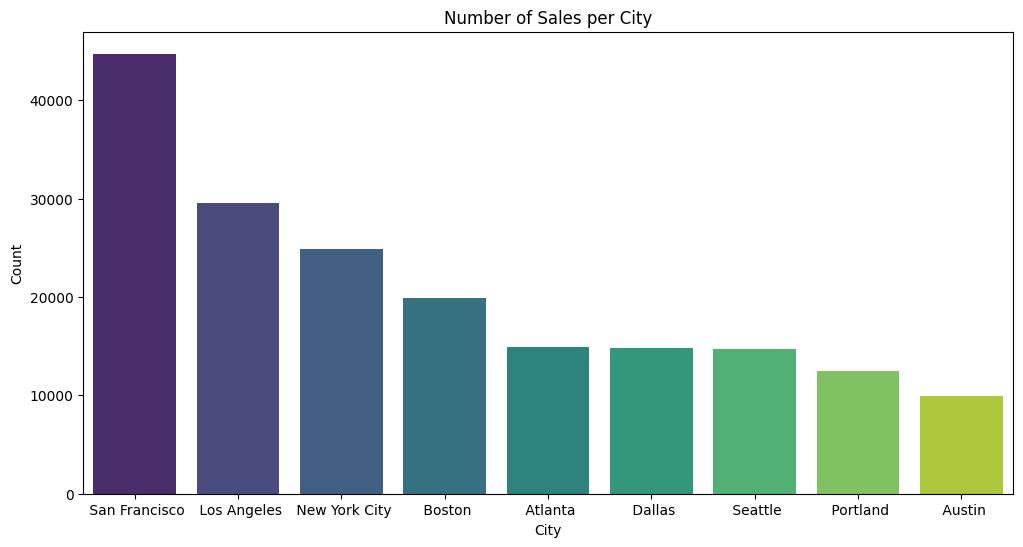

In [ ]:
# Visualize the orders for cities
plt.figure(figsize=(12,6))
sns.barplot(x=city_count.index, y=city_count.values, palette='viridis')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of Sales per City')
plt.show()

In [ ]:
# what time should we display advertisement to maximize product purchase?
keys = [] # store unique values in the 'Hour' column
hour = [] # store the count of entries for each hour
for key, hour_df in df_sales.groupby('Hour'):
    keys.append(key) # append "Hour" value to the keys list
    hour.append(len(hour_df)) # append the count of entries in the group

In [ ]:
print (keys)
print (hour)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[3910, 2350, 1243, 831, 854, 1321, 2482, 4011, 6256, 8748, 10944, 12411, 12587, 12129, 10984, 10175, 10384, 10899, 12280, 12905, 12228, 10921, 8822, 6275]


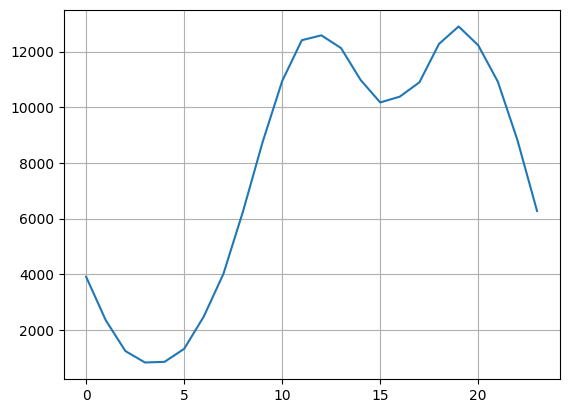

In [ ]:
# visualize sales in hours
plt.grid()
plt.plot(keys,hour)

<Axes: xlabel='Product'>

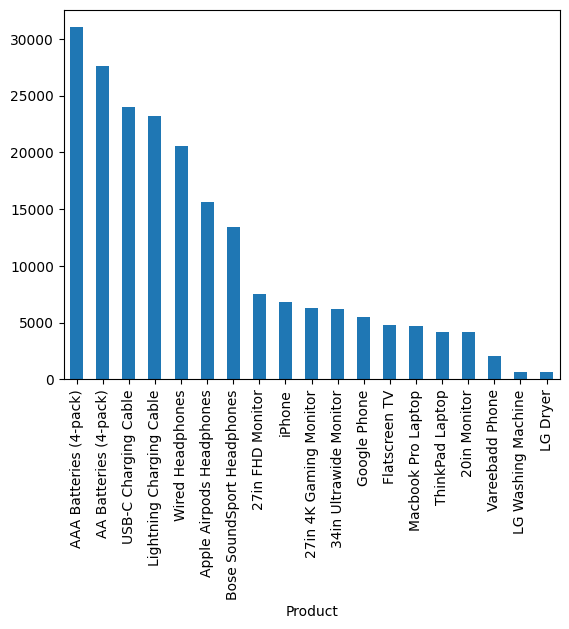

In [ ]:
# What product sold the most?
df_sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar')

In [ ]:
# the revenue of each product
df_sales['Revenue'] = df_sales['Quantity Ordered'] * df_sales['Price Each']
df_sales.head(5)

revenue_product = df_sales.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
revenue_product


Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Revenue, dtype: float64

<ipython-input-23-74025cd7123a>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

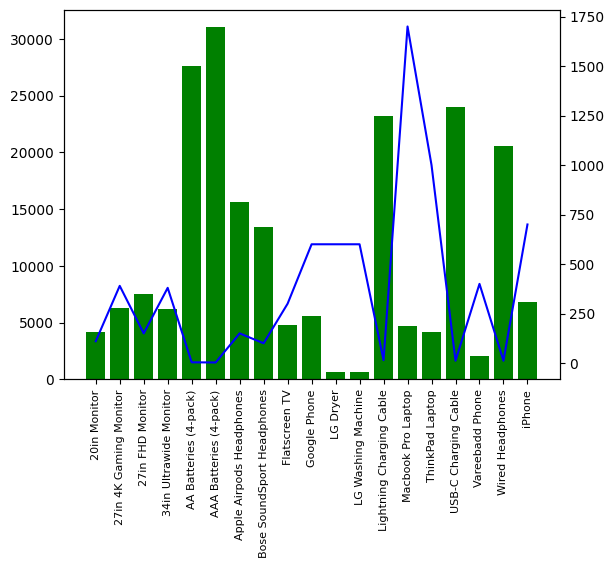

In [ ]:
# why makes this the top sales item made the least revenue? explore the unit price
products = df_sales.groupby('Product')['Quantity Ordered'].sum().index
quantity = df_sales.groupby('Product')['Quantity Ordered'].sum()
price = df_sales.groupby('Product')['Price Each'].mean()

# draw graph
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots() # creates a subplot within the previous fig
ax2 = ax1.twinx() # create a new subplot shares the same x-axis
ax1.bar(products,quantity,color = 'g')
ax2.plot(products,price, 'b-')
ax1.set_xticklabels(products,rotation='vertical',size=8)

In [ ]:
# any products are often sold together?
pair_sold = df_sales[df_sales['Order ID'].duplicated(keep=False)]

# create a new column to group by the products within same order id
pair_sold['Grouped'] = pair_sold.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-24-22dc4aa3ad4e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: ylabel='Grouped'>

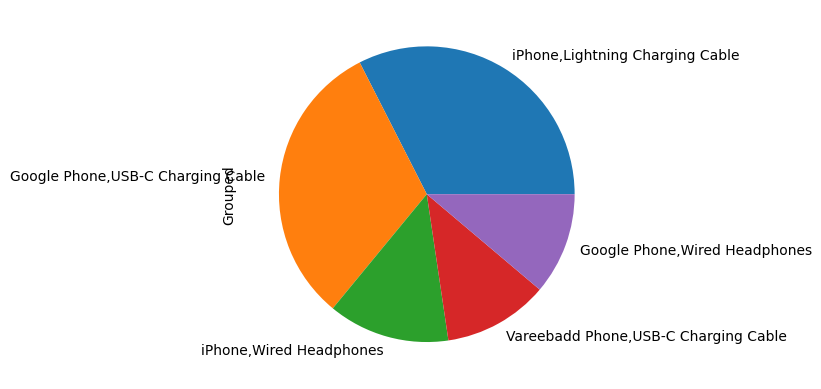

In [ ]:
pair_sold2 = pair_sold.drop_duplicates(subset=['Order ID']) # drop extra duplicated id

pair_sold2['Grouped'].value_counts()[0:5].plot.pie()

In [ ]:
values = pair_sold2['Grouped'].value_counts().sort_values(ascending=False)[0:5]
labels = pair_sold2['Grouped'].value_counts()[0:5].index

trace = go.Pie(labels=labels, values=values,
               hoverinfo = 'label+percent', textinfo = 'value',
               textfont = dict(size=25),
               pull = [0.2,0,0,0,0]
              )

In [ ]:
iplot([trace])